
# Final Project of Introduction to Bioinformatics

## The Song Bird Study

<div style="text-align: center;">
    <img src="SocialNetworking.png" width="350">
</div>

### Introduction

#### Investigating the Influence of Social Environment on Neural Responses to Sickness in Zebra Finches: A Bioinformatics Approach

The Zebra Finch, _Taeniopygia guttata_, a widely used model organism in behavioral and neurobiological research, provides an excellent platform to study the interplay between social environment, neural function, and immune response. In this project, we delve into an intriguing scientific question: How does the social environment of these birds modulate their neural response to immune challenges?

This question was explored in a study by Lopes PC, Faber-Hammond JJ, Siemonsma C, Patel S, and Renn SCP, titled _"The social environment alters neural responses to a lipopolysaccharide challenge"_ (Brain Behav Immun 2023). Their research demonstrated that the social environment, particularly the presence of conspecifics, could significantly modulate the neural responses of Zebra Finches to immune challenges such as lipopolysaccharide (LPS), a molecule known to induce immune responses. Link to Paper

Our goal in this notebook is to revisit and build upon the findings of this study. Using RNA sequencing data from their research, we aim to conduct a comprehensive analysis of changes in gene expression across different brain regions of Zebra Finches under different social conditions. We will specifically focus on the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae, all of which are key regions for understanding behavior and immune response.

The essence of this project is to draw meaningful insights from high-dimensional data. We encourage you to start with basic approaches and gradually build complexity. Remember, every effort to extract information and gain insights from the data is valuable and will be recognized. Approach the tasks with curiosity and an open mind, and let your analytical journey be both informative and enjoyable.

---

### Experiment Design

The primary aim of this high-throughput sequencing study was to discern how different social environments could modulate the neural response to sickness induced by lipopolysaccharide (LPS).

**Lipopolysaccharide (LPS)** is a large molecule consisting of a lipid and a polysaccharide, found in the outer membrane of Gram-negative bacteria. It is often referred to as an endotoxin due to its ability to trigger strong immune responses. When a Gram-negative bacterium dies, it releases its LPS, which can then find its way into the bloodstream. In the context of this study, LPS was used to simulate an immune challenge or sickness in the Zebra Finches.

**The Experimental Setup:**

The experiment involved male Zebra Finches, which were administered either an LPS injection to simulate sickness or a control solution. Following the injection, the birds were placed in one of four distinct social contexts:

- **Isolated (ISO)**: In this setting, the birds were kept alone without a female. This condition was designed to examine the neural and immune responses of the birds in the absence of any social interactions. This group helps to understand the baseline responses to the LPS challenge when there are no social factors at play.
- **Known Female Continuous (KFC)**: Here, the birds were continuously housed with a known female. This condition allowed the researchers to investigate the effects of a stable social environment on the birds' responses to the LPS challenge. This group can provide insights into how ongoing social interactions might influence the response to sickness.
- **Known Female Reunited (KF)**: In this scenario, the birds were reunited with a known female after a period of separation. This condition was intended to mimic the effects of a disrupted social environment followed by a reunion. This group can shed light on how changes in social relationships might affect the neural and immune responses to sickness.
- **Novel Female (NF)**: In this context, the birds were paired with a previously unknown female. This condition was designed to explore the effects of introducing a new social partner on the birds' responses to the LPS challenge. This group can reveal how novel social encounters might modulate the response to sickness.

These social settings were carefully chosen to represent a range of social interactions that the birds might encounter in their natural habitats. The experimental design allows for a comprehensive investigation of how social environment influences the neural responses to sickness, thereby improving our understanding of how the social environment can affect health.

---

### Step 0: Installing Necessary Packages

### Understanding RNA-Seq

RNA-Seq (RNA sequencing) is a powerful technique that uses next-generation sequencing (NGS) to reveal the presence and quantity of RNA molecules in a biological sample. It provides a snapshot of gene expression, also known as the transcriptome.

**What is RNA-Seq?**

RNA-Seq allows us to investigate and discover the transcriptome, which is the total cellular content of RNAs including mRNA, rRNA, and tRNA. Understanding the transcriptome is key if we are to connect the information in our genome with its functional protein expression. RNA-Seq can tell us which genes are turned on in a cell, what their level of transcription is, and at what times they are activated or shut off. This allows scientists to understand the biology of a cell more deeply and assess changes that may indicate disease.

**How does RNA-Seq work?**

The RNA-Seq workflow has several steps:

1. **RNA extraction**: The first step involves extracting the total RNA from the sample.
2. **Reverse transcription into cDNA**: The extracted RNA is then converted into complementary DNA (cDNA) through a process called reverse transcription.
3. **Library preparation**: The cDNA is then used to prepare a sequencing library. This involves fragmenting the cDNA, adding sequencing adapters, and amplifying the library.
4. **Sequencing**: The prepared library is then sequenced using high-throughput sequencing technology.

**RNA-Seq Data**

The output of an RNA-Seq experiment is a large set of short DNA sequences, or reads. These reads can be aligned to a reference genome to determine which genes were being transcribed at the time the sample was collected. The number of reads aligning to a particular gene provides a measure of that gene's expression level.

**RNA-Seq vs Microarrays**

RNA-Seq has several advantages over microarray technology, a legacy technology often used in gene expression studies. Unlike microarrays, which require species- or transcript-specific probes, RNA-Seq does not require any prior knowledge about the sequences of the transcripts. This allows RNA-Seq to detect novel transcripts, gene fusions, single nucleotide variants, indels (small insertions and deletions), and other previously unknown changes. RNA-Seq also has a wider dynamic range and higher sensitivity compared to microarrays, making it better at detecting transcripts and specifically isoforms.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why is it important to convert RNA into cDNA for RNA-Seq? What would happen if we tried to sequence RNA directly?
2. How does the process of preparing a sequencing library contribute to the accuracy of RNA-Seq results? What are some potential sources of error in this step?
3. How does the ability of RNA-Seq to detect novel transcripts contribute to our understanding of gene function? Can you think of a scenario where this capability would be particularly useful?
4. Why might a researcher choose to use RNA-Seq instead of microarrays for a gene expression study? What are some potential advantages and disadvantages of each method?


**_Your Answer:_**:

---
1.

[I used this article to answer the given question](https://en.wikipedia.org/wiki/RNA-Seq#:~:text=RNA%2DSeq%20(named%20as%20an,sample%2C%20also%20known%20as%20transcriptome.)


*RNA* is reverse transcribed to **cDNA** because **DNA** is more stable and to allow for amplification (which uses **DNA polymerases**) and leverage more mature **DNA sequencing** technology. Amplification subsequent to reverse transcription results in loss of strandedness, which can be avoided with chemical labeling or single molecule sequencing. Fragmentation and size selection are performed to purify sequences that are the appropriate length for the sequencing machine. The *RNA*, **cDNA**, or both are fragmented with enzymes, sonication, or nebulizers. Fragmentation of the *RNA* reduces 5' bias of randomly primed-reverse transcription and the influence of primer binding sites,[12] with the downside that the 5' and 3' ends are converted to **DNA** less efficiently.

**DNA** is inherently more stable than *RNA*, which is prone to enzymatic degradation due to its single-stranded nature. The conversion to **cDNA** helps preserve the genetic information, ensuring the accuracy and reliability of sequencing results. Additionally, the reverse transcription process, responsible for converting *RNA* to **cDNA**, enables the amplification of genetic material. This is crucial when the initial *RNA* sample is limited, ensuring that there is sufficient material for downstream sequencing steps. Moreover, high-throughput sequencing technologies are predominantly designed for **DNA** rather than *RNA*. Converting *RNA* to **cDNA** ensures compatibility with existing **DNA sequencing** platforms, which are more mature and widely adopted in research. Attempting to sequence *RNA* directly poses challenges, including *RNA* instability, limitations with sequencing platforms optimized for **DNA**, and the inefficiency of direct *RNA* sequencing. In summary, the conversion of *RNA* to **cDNA** is pivotal in enhancing stability, enabling amplification, and ensuring compatibility with established **DNA sequencing** technologies, all contributing to the success and reliability of *RNA-Seq* experiments.


[I used this article to answer the given question](https://www.frontiersin.org/articles/10.3389/fgene.2020.00394/full)


The direct *RNA* sequencing approach developed by **ONT** does not go through the conversion of *RNA* into **cDNA**, and does not rely on amplification steps. For these reasons, the *RNA modifications* are preserved and can induce specific alterations in the current registered by the sequencer ([Garalde et al., 2018](link)).

The field of *dRNA-seq* (direct *RNA* sequencing) faces several limitations in its current state. Firstly, existing protocols for *dRNA-seq* are designed for either non-polyadenylated or polyadenylated *RNAs* due to library preparation methods targeting polyA tails or specific 3′ sequences. This limitation could be addressed by using adapters with random 3′ sequences or in vitro polyadenylation. Secondly, while the throughput of *dRNA-seq* is growing, it currently compares to low- or mid-end coverage of *srRNA-seq* experiments, potentially limiting the number of detectable transcripts. Improvements in nanopore translocation speed or extending sequencing time may address this. Thirdly, *dRNA-seq* has lower base calling accuracy compared to *srRNA-seq*, especially at sites of *RNA modification*. However, this inaccuracy may aid in identifying modified bases. Lastly, detectability limitations exist for specific *RNA modifications*, such as blockages during sequencing with 4sU modified nucleotides. Despite these challenges, the field is rapidly evolving, with collaborative efforts aimed at overcoming these limitations in the coming years.

---

2.


[I used this article to answer the given question](https://www.biocompare.com/Bench-Tips/566795-Tips-and-Tricks-for-Successful-RNA-seq-Library-Preparation/#:~:text=Prior%20to%20library%20preparation%2C%20RNA,compromising%20the%20accuracy%20of%20results.)


The first step in the RNA-seq workflow is the creation of RNA sequencing libraries, a multi-step process in which the RNA sample is prepared for analysis on a sequencing instrument. The quality of these libraries is a critical factor in the value of the final sequencing data. This article offers some best practices for handling RNA samples, as well as some tips and tricks for successful preparation of RNA-seq libraries.

Handling samples carefully and decontaminate workspaces
Prior to library preparation, RNA is isolated from cells, tissues, or other biological samples. During this process, and during library prep, it is essential to avoid introducing RNases; these enzymes rapidly degrade RNA, compromising the accuracy of results. Before handling the RNA, decontaminate all workspaces and equipment using a solution designed to destroy RNases (available from numerous retailers), and ensure that consumables such as pipette tips, tubes, and reagents are certified as RNase-free. It is also good practice to change gloves regularly.

Maintain the quality and integrity of RNA samples by storing RNA in a freezer, and by keeping RNA on ice when in use (unless otherwise noted in your workflow). Minimize the number of freeze-thaw cycles (for example, by storing the RNA in small aliquots), and avoid vortexing RNA whenever possible as this can increase fragmentation. Users should also ensure that their input into library preparation is DNase-treated purified RNA and not total nucleic acids. Contaminating DNA into RNA library preparation workflows can lead to downstream issues and less efficient reactions.

The accuracy of RNA-Seq results is intricately tied to the meticulous process of preparing the sequencing library. This crucial step involves converting RNA molecules into a format suitable for high-throughput sequencing, and its precision directly influences the reliability of subsequent transcriptome analyses. A key contributor to accuracy is the reduction of biases introduced during reverse transcription and amplification. Efficient library preparation minimizes these biases, ensuring a more even representation of transcripts and providing a faithful portrayal of RNA abundance. Additionally, the incorporation of Unique Molecular Identifiers (UMIs) during library preparation aids in mitigating errors introduced during PCR amplification, enhancing the precision of quantifying transcript abundance. However, potential sources of error exist, including PCR amplification artifacts, contamination, RNA degradation, inefficient reverse transcription, variable fragmentation, and adapter ligation issues. Rigorous adherence to best practices, quality control measures, and the optimization of library preparation methods are crucial for minimizing these errors and ensuring the accuracy of RNA-Seq results, allowing for a reliable depiction of the transcriptomic landscape.


[I used this article to answer the given question](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8079181/)


Contributions to Accuracy:

Reduction of Bias: Efficient library preparation aims to minimize biases introduced during various steps, such as reverse transcription and amplification. Biases can result in uneven representation of transcripts, leading to skewed results. Minimizing bias allows for a more accurate portrayal of the true RNA abundance across different transcripts.

Use of Unique Molecular Identifiers (UMIs): The incorporation of UMIs during library preparation helps mitigate errors introduced during PCR amplification. UMIs are unique sequences added to individual RNA molecules before amplification, enabling the identification and removal of PCR duplicates. This enhances the accuracy of quantifying transcript abundance.

Proper Handling of Low-Abundance Transcripts: Library preparation methods should be optimized to detect rare and low-abundance transcripts. Proper handling of these transcripts, including appropriate sequencing depth, ensures that even less abundant RNA species are accurately captured and represented in the sequencing data.

Adherence to Best Practices: Following established best practices in library preparation, including quality control measures, helps ensure consistency and reproducibility. Stringent quality control checks, such as assessing RNA integrity and monitoring library size distribution, contribute to the overall accuracy of RNA-Seq results.

The preparation of a sequencing library involves several potential sources of error that can impact the accuracy of RNA-Seq results. During the PCR amplification step, errors such as amplification bias, chimeric fragments, and PCR duplicates can be introduced, distorting the representation of RNA species in the library and leading to inaccuracies in quantification. Contamination, whether from environmental sources or cross-contamination between samples during library preparation, is another potential source of error that can misinterpret sequencing data and compromise downstream analyses. Poor RNA quality or degradation during sample handling and library preparation can result in incomplete or biased representation of the transcriptome, emphasizing the crucial need for high-quality starting material. Incomplete or inefficient reverse transcription may lead to underrepresentation of specific transcripts, making robust reverse transcription essential for accurate quantification of RNA species. Inconsistent fragmentation of RNA during library preparation can result in uneven coverage across transcripts, emphasizing the importance of proper fragmentation and size selection for achieving accurate and representative sequencing results. Additionally, errors in adapter ligation, such as incomplete or incorrect ligation, can impact the efficiency of sequencing reactions, underscoring the importance of adequate quality control for adapter ligation to ensure correct reading of the library by sequencers.

Securing accurate RNA-Seq outcomes heavily hinges on the meticulous preparation of the library. This intricate process entails ensuring seamless conversion of RNA into cDNA, fragmenting it precisely, affixing the appropriate adapters, and meticulously duplicating it through PCR. Errors may surface during these critical stages, such as RNA degradation, inherent biases in duplication, inconsistent fragmentation, or inadvertent introduction of contaminants (adapter contamination).

---

3.


[I used this article to answer the given question](https://www.frontiersin.org/articles/10.3389/fgene.2023.997383/full#:~:text=RNA%2Dseq%20analysis%20enables%20genes,and%20studying%20alternative%20splicing%20structure.)


**RNA-seq analysis** enables genes and their corresponding transcripts to be probed for a variety of purposes, such as detecting novel exons or whole transcripts, assessing expression of genes and alternative transcripts, and studying alternative splicing structure. It can be a challenge, however, to obtain meaningful biological signals from raw RNA-seq data because of the enormous scale of the data as well as the inherent limitations of different sequencing technologies, such as amplification bias or biases of library preparation.

The need to overcome these technical challenges has pushed the rapid development of novel computational tools, which have evolved and diversified in accordance with technological advancements, leading to the current myriad of RNA-seq tools. These tools, combined with the diverse computational skill sets of biomedical researchers, help to **unlock the full potential of RNA-seq**. The purpose of this review is to explain basic concepts in the computational analysis of RNA-seq data and define discipline-specific jargon.

*One particularly useful scenario for this capability is in cancer research.* Tumor cells often exhibit complex and dynamic changes in gene expression, including the generation of novel transcripts and alternative splicing events. **RNA-Seq allows for the comprehensive profiling of the transcriptome** in cancer samples, enabling the discovery of novel transcripts associated with tumorigenesis, metastasis, and drug resistance. Understanding the full spectrum of gene expression alterations in cancer cells, including the detection of novel transcripts, enhances our ability to identify potential therapeutic targets and develop more effective treatment strategies.

*Another scenario is Unraveling Immune Response in Infectious Diseases.*

In infectious diseases, the host's immune response plays a crucial role in determining the outcome of the infection. **RNA-Seq serves as a powerful tool** to comprehensively study gene expression changes in the host during different stages of infection, shedding light on the dynamic interplay between pathogens and the immune system.

**RNA-Seq's capacity to detect novel transcripts** contributes to a deeper understanding of gene function by revealing previously unknown layers of transcriptomic complexity. This capability is particularly valuable in scenarios where traditional methods may fall short, such as in the context of cancer research, where identifying novel transcripts can offer critical insights into the molecular mechanisms underlying disease progression and treatment resistance.


Imagine you're in the midst of cancer research, and you stumble upon a new transcript. It's a potential game-changer, possibly linked to the cause of the disease. This discovery sparks hope, suggesting it could lead to breakthroughs in understanding and treating cancer. As you investigate further, excitement builds, knowing that unraveling its secrets could pave the way for new therapies and, hopefully, a cure.

---
4.

[I used this article to answer the given question](https://www.illumina.com/science/technology/next-generation-sequencing/microarray-rna-seq-comparison.html#:~:text=%E2%80%9CmRNA%2DSeq%20offers%20improved%20specificity,and%20offers%20increased%20dynamic%20range.%E2%80%9D)

[and also](https://www.frontiersin.org/articles/10.3389/fgene.2018.00636/full)

**Benefits of RNA-Seq vs. Microarray Technology**

*Ability to detect novel transcripts:* Unlike arrays, RNA-Seq technology does not require species- or transcript-specific probes. It can detect novel transcripts, gene fusions, single nucleotide variants, indels (small insertions and deletions), and other previously unknown changes that arrays cannot detect.[1,2]

*Wider dynamic range:* With array hybridization technology, gene expression measurement is limited by background at the low end and signal saturation at the high end. RNA-Seq technology produces discrete, digital sequencing read counts, and can quantify expression across a larger dynamic range (>10^5 for RNA-Seq vs. 10^3 for arrays).[1,2,3]

*Higher specificity and sensitivity:* Compared to microarrays, RNA-Seq technology can detect a higher percentage of differentially expressed genes, especially genes with low expression.[4-6]

*Simple detection of rare and low-abundance transcripts:* Sequencing coverage depth can easily be increased to detect rare transcripts, single transcripts per cell, or weakly expressed genes.

**Advantages of microarray:**

*Lower Cost:* RNA-Seq tends to be more expensive than microarrays, especially for large-scale studies. This cost consideration may impact the choice of method, particularly in budget-constrained projects.

*Less Computational Complexity:* Analyzing RNA-Seq data requires more computational resources and expertise compared to microarrays. The bioinformatics analysis pipeline involves multiple steps, including alignment, transcriptome assembly, and quantification.

*Data Storage and Processing Requirements:* RNA-Seq generates large amounts of data, requiring significant storage and computational power. This can be a limitation for laboratories with limited resources.

[I used this article to answer the given question](https://biosistemika.com/blog/qpcr-microarrays-rna-sequencing-choose-one/)

**RNA-seq makes sense if you want to find DE genes in a huge, non-sequenced genome. If you are working with small genomes like bacteria for example, sequence its genome first! Lack of a reference genome means you will have to assemble the transcriptome “de-novo”, for which you will need a lot of RAM and some serious computing power if you do not want to wait for ages.**

*In most cases, obtaining the expression profile of your sample would still be a bit cheaper using microarrays instead of RNA-sequencing, the difference being in the range of 50 to 100 EUR/USD per sample. However, the benefits of RNA-seq can easily outweigh the extra cost.*

*sometimes it makes sense to use microarrays. You might have a good reason to stick to microarrays, if none of the parameter listed above is critical, and/or one of the following applies:*

- *you use a microarray-based diagnostic test with proven clinical utility,*
- *you have a large number of samples and cost is critical,*
- *you want to be able to compare the expression profiles directly with another microarray data set of the same array platform, or*
- *you have a running microarray workflow in-house (or with trusted partners) from sample collection to data analysis that you are happy with.*

*Finally, one point from a bioinformatician’s viewpoint that you might want to consider: if you have a researcher in your team who will use the data to learn bioinformatics, just remember that RNA-seq data analysis is definitely a more useful skill in modern (and future!) labs than microarray analysis.*


In [28]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'xlrd',
    'mygene'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

biopython (1.82) is installed
pandas (2.1.4) is installed
numpy (1.24.3) is installed
matplotlib (3.8.2) is installed
seaborn (0.13.1) is installed
xlrd (2.0.1) is installed
mygene (3.2.2) is installed


In [29]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import warnings
import mygene
from sklearn.manifold import TSNE
from mygene import MyGeneInfo
from pathlib import Path
import json

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

figsize = (16, 8)

### Loading the Dataset: A First Glimpse into the Zebra Finch's World

With our tools at the ready, let's embark on the initial phase of our exploration. We'll load the dataset containing the read counts from the Zebra Finch RNA-Seq study and begin to unravel the secrets it holds.

In [ ]:
!git clone https://github.com/IntroductiontoBioinformaticsFall2023/intro-to-bio-sut-final-project.git

fatal: destination path 'intro-to-bio-sut-final-project' already exists and is not an empty directory.


In [ ]:
# Loading the RNA-Seq read count data
dataset_path = '/content/intro-to-bio-sut-final-project/tasks/the-songbird-study/dataset/GSE203528_readcount.xls'

df_read_counts = pd.read_csv(dataset_path, sep='\t')

df_read_counts.to_csv('/content/inp-raw.csv', sep=",", index=False)

display(df_read_counts.head())

,geneID,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,HY14,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,145,113,149,121,159,172,133,153,192,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,25,18,21,29,22,38,23,34,35,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,915,681,938,638,900,749,736,717,657,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,5,5,5,14,5,4,22,13,11,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,226,211,221,257,202,197,231,201,263,...,271,273,423,226,242,216,365,414,313,316


#### Exploring the Zebra Finch RNA-Seq Data

In this RNA-Seq dataset, we delve into the complex world of the Zebra Finch by examining gene expression in three distinct areas of the brain: the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae. Each of these regions plays a unique role in bird behavior and physiology.

- **The Hypothalamus** (HY samples): This region is crucial for controlling hormones and basic survival functions like feeding, fighting, fleeing, and reproduction.
- **The Bed Nucleus of the Stria Terminalis** (NST samples): This area is involved in the bird's stress response and emotional behavior.
- **The Nucleus Taeniae** (TN samples): An area of the brain unique to birds, thought to be involved in social behaviors and possibly song learning.

These regions were likely chosen for their significant roles in behaviors that are crucial for survival and species-specific activities. By analyzing gene expression in these areas, researchers can gain insights into how these regions contribute to the unique behaviors of the Zebra Finch.

**Dataset Breakdown**

Each row in the dataset represents a different gene, identified by a geneID like `ENSTGUG00000008284`. The columns, labeled with codes like `HY3`, `HY4`, `NST3`, etc., correspond to samples from these three brain regions. The numbers are read counts, indicating how often each gene's RNA was detected in the sample. High numbers suggest a gene is very active in that sample.

These numbers are crucial. They tell us how active each gene was in each sample. The higher the number, the more active the gene. By comparing these numbers across different samples, we can get insights into how gene activity varies in different situations or conditions.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why do you think the read counts vary between different genes in the same sample? What biological factors might contribute to this variation?
2. Can you think of any reasons why the read counts for the same gene might vary between different samples? Consider the experimental design and the nature of biological systems.
3. How would you interpret a situation where a gene has a high read count in one sample and a low read count in another? What might this tell us about the gene's role in the Zebra Finch's response to its social environment and the LPS challenge?


**Before proceeding, it's essential to ensure you have a foundational understanding of RNA-Seq, the objectives and design of the experiment we're examining, and the significance of each cell in the dataset. Grasping these concepts is crucial for successfully navigating the tasks ahead.**

---

#### Exploring the Zebra Finch RNA-Seq Data

In this RNA-Seq dataset, we delve into the complex world of the Zebra Finch by examining gene expression in three distinct areas of the brain: the hypothalamus, the bed nucleus of the stria terminalis, and the nucleus taeniae. Each of these regions plays a unique role in bird behavior and physiology.

- **The Hypothalamus** (HY samples): This region is crucial for controlling hormones and basic survival functions like feeding, fighting, fleeing, and reproduction.
- **The Bed Nucleus of the Stria Terminalis** (NST samples): This area is involved in the bird's stress response and emotional behavior.
- **The Nucleus Taeniae** (TN samples): An area of the brain unique to birds, thought to be involved in social behaviors and possibly song learning.

These regions were likely chosen for their significant roles in behaviors that are crucial for survival and species-specific activities. By analyzing gene expression in these areas, researchers can gain insights into how these regions contribute to the unique behaviors of the Zebra Finch.

**Dataset Breakdown**

Each row in the dataset represents a different gene, identified by a geneID like `ENSTGUG00000008284`. The columns, labeled with codes like `HY3`, `HY4`, `NST3`, etc., correspond to samples from these three brain regions. The numbers are read counts, indicating how often each gene's RNA was detected in the sample. High numbers suggest a gene is very active in that sample.

These numbers are crucial. They tell us how active each gene was in each sample. The higher the number, the more active the gene. By comparing these numbers across different samples, we can get insights into how gene activity varies in different situations or conditions.

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer these questions!</strong>
</blockquote>

**Questions**

1. Why do you think the read counts vary between different genes in the same sample? What biological factors might contribute to this variation?
2. Can you think of any reasons why the read counts for the same gene might vary between different samples? Consider the experimental design and the nature of biological systems.
3. How would you interpret a situation where a gene has a high read count in one sample and a low read count in another? What might this tell us about the gene's role in the Zebra Finch's response to its social environment and the LPS challenge?


**Before proceeding, it's essential to ensure you have a foundational understanding of RNA-Seq, the objectives and design of the experiment we're examining, and the significance of each cell in the dataset. Grasping these concepts is crucial for successfully navigating the tasks ahead.**

---

1-

[Used this article](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-11-94)

When we look at genes in a sample, the number of reads they have can vary. This happens for a few reasons. One big reason is that different genes are used by cells in different ways. Some genes are very active and used a lot, while others are not used as much. So, the genes that are used a lot will have more reads.

The length of a gene also matters. Longer genes make more RNA molecules during a process called transcription. This means they end up with more reads during sequencing.

The type of building blocks in a gene, called GC content, can affect things too. Genes with a lot of GC content might not be read as well during sequencing, causing differences in read counts.

Genes can come in different versions, called isoforms. These variations can lead to differences in read counts because each isoform might be used differently by the cell.

Things happening in the cell, like its stage in the life cycle or how it's responding to the environment, can also cause read counts to vary. This is because genes are turned on or off based on what the cell needs to do.

The way we handle samples, make libraries, and how deep we sequence them can introduce some variability too. It's like how you might take a slightly different route every time you walk to a friend's house.

To make sure our comparisons are fair, we use normalization methods. These methods help us correct for differences caused by technical stuff, like the size of the library or biases in the sequencing process. Choosing the right normalization method is crucial to get accurate results when comparing genes (Bullard et al., 2010).

---

2-

Biological Variety: Our bodies are always changing, and so are the jobs our genes do. Depending on what kind of cells we have, how old we are, or even what's happening around us, genes can act differently. This variety in the samples can make the read counts for the same gene look different (Link).

Healthy or Not-So-Healthy: If a sample comes from someone who is sick or healthy, that can make a big difference. Diseases can shake things up and change how genes behave. So, the read counts for a gene might be higher or lower based on whether someone is feeling under the weather or not (Link).

Our Unique Genes: Each of us is like a unique book with our own story written in our genes. Some people might have small changes in their genes, called mutations, that make them different from others. These differences can affect how much a gene gets read, leading to variations in read counts (Link).

Mix of Different Cells: Imagine if our samples are like a mix of different types of cells. Each cell type might use certain genes more than others. So, the read counts for a gene can change based on the mix of cells in the sample (Link).

How We Do Experiments: When scientists work with samples, they have to follow certain steps, like preparing the sample and reading the genes. If these steps are a bit different between samples, it can affect the read counts. Small changes in the recipe can lead to variations in the results (Link).

Sequencing Depth: It's like taking a deeper look into a story. If we read more pages of a book, we might find more details. Similarly, if we read more of the genetic code, we get more accurate information. But not all samples get read the same amount, and that can influence the read counts (Link).

Making Things Fair with Normalization: Scientists use tricks to make sure the comparisons between samples are fair. It's like adjusting the volume so all the songs in a playlist sound just right. The way they adjust things, called normalization, helps to balance out differences caused by technical stuff (Link).

Watch Out for Tricky Stuff: Sometimes, the machines and tools used in experiments can act a bit tricky. They might make mistakes or show preferences, like picking one song over another. Scientists have to keep an eye out for these tricks, known as technical artifacts, to make sure the results are reliable (Link).


In gene expression studies, it's crucial to acknowledge and address various sources of variability that can influence experimental results. Firstly, temporal variability within samples may arise due to factors like the developmental stage of cells or external stimuli affecting samples at different times of the day. Secondly, tissue-specific functionality contributes to differences in gene expression between samples from distinct tissues, reflecting their specialized roles and compositions. Moreover, the specific conditions under study play a significant role; for instance, genes may exhibit differential activity during social interactions or in response to immune challenges. Lastly, inter-individual differences among samples collected from different individuals, such as diverse bird breeds, can introduce variability stemming from genetic inheritance and individual traits. By considering and accounting for these factors, researchers can ensure a more accurate interpretation of gene expression data, thereby advancing our understanding of biological processes and phenomena.

---

3-

So, imagine we're looking at genes in Zebra Finches, and we notice that one gene acts differently in different situations. When the birds are in a social setting, this gene is very active, but when they face a certain challenge (let's call it LPS), its activity drops. This suggests that the gene might be playing a special role in how the birds handle social situations.

Think of this gene like a superstar at social events. It gets all hyped up and busy when the birds are hanging out with each other, but when faced with a challenge, it kind of takes a back seat. This tells us it's probably not the go-to gene for dealing with that specific challenge.

Now, this gene might be a big deal for the finches in their social circles. It could be responsible for behaviors, signals, or even the way their bodies work during social interactions. It's like the gene has a specific job in making sure the birds act the right way or respond to social stuff.

Also, the fact that this gene acts differently in different situations suggests it's adaptable. It's part of a system that turns on or off depending on what's happening around the birds. It's like the gene is a smart player, adjusting its moves based on what's going on.

Surprisingly, when it comes to dealing with the LPS challenge, the gene doesn't seem to be as active. It's like this challenge doesn't really get the gene excited or doing much. So, maybe this gene isn't the main player when it comes to challenges like the LPS thing. Or, it could be doing something important, but it doesn't show up much in the "messenger" molecules we're checking.

Understanding that genes can act differently based on what's happening is key here. This gene's varying activity might not be because it's a superhero in every situation but perhaps because it has a special role in the Zebra Finches' social scenes.

To be sure about all this, scientists would need to do more tests, like using fancy machines to double-check the gene's activity. They might also dig deeper into what kind of jobs this gene is linked to in the bird's body. It's like detective work for genes!

In order to effectively interpret results, it's crucial to normalize them. This is because the total number of reads in one sample can vary, leading to higher average read counts for each gene. Normalization ensures that differences in read counts between samples accurately reflect biological variations rather than technical artifacts.

For instance, after normalization, if the read count of gene X is higher in sample A compared to sample B, it suggests that gene X is somehow associated with the observed differences between A and B. For example, if sample A is exposed to lipopolysaccharide (LPS) while sample B is not, an elevated expression of gene X in sample A may indicate its involvement in immune system activity. Similarly, if sample A is in a social setting while sample B is isolated, an increased expression of gene X in sample A might suggest its role in socialization-related functions.

By normalizing the data, we can confidently attribute variations in gene expression to specific experimental conditions or biological states, thereby gaining valuable insights into the underlying mechanisms at play.

In [ ]:
# Loading the RNA-Seq read count data
dataset_path = '/content/intro-to-bio-sut-final-project/tasks/the-songbird-study/dataset/GSE203528_readcount.xls'

df_read_counts = pd.read_csv(dataset_path, sep='\t')

df_read_counts.to_csv('/content/inp-raw.csv', sep=",", index=False)

display(df_read_counts.head())

,geneID,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,HY14,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,145,113,149,121,159,172,133,153,192,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,25,18,21,29,22,38,23,34,35,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,915,681,938,638,900,749,736,717,657,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,5,5,5,14,5,4,22,13,11,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,226,211,221,257,202,197,231,201,263,...,271,273,423,226,242,216,365,414,313,316


## Preprocessing and Normalization

In this section, we begin our data analysis by focusing on preprocessing and normalization. Preprocessing involves converting the raw Ensembl gene IDs into more recognizable gene symbols, enhancing the interpretability of our data. Following this, normalization is performed to adjust for variations in sequencing depth and gene length, a crucial step to ensure accurate comparison of gene expression across different samples.

### Transforming and Merging the Dataset for Analysis

To facilitate our analysis, we need to restructure the gene expression data so that each row corresponds to a sample, with appropriate labels for social settings and tissue types. This transformation will enable us to apply machine learning techniques and conduct more effective analyses.

The process involves two main steps:
1. **Transpose the Gene Expression Data**: Convert the gene expression data so that each row represents a sample and each column corresponds to a gene.
2. **Merge with Sample Mapping**: Combine the transposed gene expression data with the `sample_mapping.csv` to add social setting, study group, and tissue type information to each sample.

This approach will create a dataset better suited for exploratory data analysis, clustering, and other statistical methods.


In [48]:
import pandas as pd

# Load the gene expression data
expression_data = pd.read_csv('./dataset/GSE203528_readcount.xls', sep='\t')

# Transpose the dataframe so that columns become rows and vice versa
transposed_df = expression_data.set_index('geneID').T.reset_index()
transposed_df.rename(columns={'index': 'tissue_id'}, inplace=True)

# Load the sample mapping data
sample_mapping = pd.read_csv('./dataset/sample_mappings.csv')

# Merge the transposed gene expression data with the sample mapping
merged_df = pd.merge(transposed_df, sample_mapping, on='tissue_id')

# Reorder columns to place metadata columns at the front
metadata_columns = ['sample_id', 'social_settting', 'study_group', 'tissue_id']
gene_columns = [col for col in merged_df.columns if col not in metadata_columns]
transformed_df = merged_df[metadata_columns + gene_columns]

# Save the transformed and merged dataset
transformed_df.to_csv('./dataset/transformed_dataset.csv', index=False)

# Display the first few rows of the transformed dataset
display(transformed_df.head())

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,145,25,915,5,226,94,...,443,493,722,0,0,0,1473,43,276,181
1,GSM6175779,ISO,S,HY5,149,21,938,5,221,76,...,327,433,523,0,0,0,1522,37,145,118
2,GSM6175780,ISO,L,HY6,121,29,638,14,257,126,...,350,370,395,0,2,1,1320,22,174,110
3,GSM6175781,ISO,L,HY8,159,22,900,5,202,178,...,418,435,389,0,26,5,1542,57,219,116
4,GSM6175782,ISO,L,HY9,172,38,749,4,197,94,...,274,342,291,0,0,5,1267,24,157,88


### Converting Ensembl IDs to Gene Names (Bonus)

In our dataset, genes are currently identified by Ensembl IDs. While these IDs are precise, they may not be as immediately recognizable as standard gene names. For those interested in working with more familiar gene names, there's a straightforward way to annotate these IDs.

**Steps to Annotate Gene IDs:**
1. **Use MyGeneInfo Library**: MyGeneInfo is a powerful tool for gene annotation. It allows you to query a database with Ensembl IDs and retrieve corresponding standard gene names.
2. **Query for Zebra Finch Genes**: Given that our study is on Zebra Finch, it's important to use the correct NCBI taxonomy ID (59729) for this species when querying.
3. **Merge Results with Original Data**: After obtaining the gene names, you can merge this information back into your dataset, linking each Ensembl ID to its standard gene name.

**Python Implementation**: 
If you wish to perform this annotation, you can use the Python library `mygene`. Initialize a `MyGeneInfo` object, query using your list of Ensembl IDs, and then merge the results with your dataset. This process adds a column for gene names, enhancing the readability and interpretability of your data.

Remember, while this annotation adds clarity, the original Ensembl IDs are crucial for maintaining the accuracy and precision of genomic data.


In [ ]:
df = transformed_df.copy()

df.head()

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,145,25,915,5,226,94,...,443,493,722,0,0,0,1473,43,276,181
1,GSM6175779,ISO,S,HY5,149,21,938,5,221,76,...,327,433,523,0,0,0,1522,37,145,118
2,GSM6175780,ISO,L,HY6,121,29,638,14,257,126,...,350,370,395,0,2,1,1320,22,174,110
3,GSM6175781,ISO,L,HY8,159,22,900,5,202,178,...,418,435,389,0,26,5,1542,57,219,116
4,GSM6175782,ISO,L,HY9,172,38,749,4,197,94,...,274,342,291,0,0,5,1267,24,157,88


In [ ]:
# METHOD 1 changing, gene column names

# Function to convert Ensembl IDs to gene names for DataFrame columns
def convert_ensembl_columns(df, ensembl_column_prefix="EN"):
    # Create a MyGeneInfo object
    mg = mygene.MyGeneInfo()

    # Extract Ensembl IDs from the DataFrame columns
    ensembl_columns = [col for col in df.columns if col.startswith(ensembl_column_prefix)]

    # Query for gene information
    query_result = mg.getgenes(ensembl_columns, fields="symbol")

    # Extract gene names from the query result
    gene_names = [entry.get("symbol", "") for entry in query_result]

    # Create a dictionary to map Ensembl IDs to gene names
    ensembl_to_gene_dict = dict(zip(ensembl_columns, gene_names))

    # Rename the DataFrame columns using the gene names
    df.rename(columns=ensembl_to_gene_dict, inplace=True)

    return df

# Convert Ensembl IDs to gene names for DataFrame columns
df_with_gene_names = convert_ensembl_columns(df.copy())


INFO:biothings.client:querying 1-1000...
INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.client:querying 8001-9000...
INFO:biothings.client:done.
INFO:biothings.client:querying 9001-10000...
INFO:biothings.client:done.
INFO:biothings.client:querying 10001-11000...
INFO:biothings.client:done.
INFO:biothings.client:querying 11001-12000...
INFO:biothings.client:done.
INFO:biothings.client:querying 12001-13000...
INFO:biothings.client:done.
INFO:biothings.client:querying 13001-14000...
INFO:biothings

In [ ]:
df_with_gene_names.head()

,sample_id,social_settting,study_group,tissue_id,,VASN,LAPTM4B,MIR125-2,PSMD6,CD38,...,,GPR37L1,,,GRM5,PLOD2,,NRBP1,,VPS18
0,GSM6175777,NF,L,HY3,145,25,915,5,226,94,...,443,493,722,0,0,0,1473,43,276,181
1,GSM6175779,ISO,S,HY5,149,21,938,5,221,76,...,327,433,523,0,0,0,1522,37,145,118
2,GSM6175780,ISO,L,HY6,121,29,638,14,257,126,...,350,370,395,0,2,1,1320,22,174,110
3,GSM6175781,ISO,L,HY8,159,22,900,5,202,178,...,418,435,389,0,26,5,1542,57,219,116
4,GSM6175782,ISO,L,HY9,172,38,749,4,197,94,...,274,342,291,0,0,5,1267,24,157,88


In [ ]:
df_with_gene_names.set_index('sample_id')
df_with_gene_names.T.columns = df_with_gene_names.sample_id
df_with_gene_names.to_csv('/content/raw-renamed-inp.csv', sep=",", index=False)

In [ ]:
gene_names_file_path = Path("genes.json")
expression_data = pd.read_csv('/content/intro-to-bio-sut-final-project/tasks/the-songbird-study/dataset/GSE203528_readcount.xls', sep='\t')


downloaded_gene_info = MyGeneInfo().querymany(list(expression_data['geneID']), species=59729)
gene_name_dict = dict()

for info in downloaded_gene_info:
    if info["query"] in gene_name_dict:
        gene_name_dict[info["query"]] += " |&| " + info['name']
    elif "name" in info:
        gene_name_dict[info["query"]] = info["name"]

with open(gene_names_file_path, "w") as file:
    json.dump(gene_name_dict, file)

with open(gene_names_file_path, 'r') as file:
    id_to_name = json.load(file)

def get_name(gene_id: str):
    if gene_id in id_to_name:
        return id_to_name[gene_id]
    return ''

expression_data_with_name = expression_data.copy()
expression_data_with_name.insert(1, "Gene Name", [get_name(i) for i in expression_data_with_name['geneID']])
expression_data_with_name.head()

INFO:biothings.client:querying 1-1000...
INFO:biothings.client:done.
INFO:biothings.client:querying 1001-2000...
INFO:biothings.client:done.
INFO:biothings.client:querying 2001-3000...
INFO:biothings.client:done.
INFO:biothings.client:querying 3001-4000...
INFO:biothings.client:done.
INFO:biothings.client:querying 4001-5000...
INFO:biothings.client:done.
INFO:biothings.client:querying 5001-6000...
INFO:biothings.client:done.
INFO:biothings.client:querying 6001-7000...
INFO:biothings.client:done.
INFO:biothings.client:querying 7001-8000...
INFO:biothings.client:done.
INFO:biothings.client:querying 8001-9000...
INFO:biothings.client:done.
INFO:biothings.client:querying 9001-10000...
INFO:biothings.client:done.
INFO:biothings.client:querying 10001-11000...
INFO:biothings.client:done.
INFO:biothings.client:querying 11001-12000...
INFO:biothings.client:done.
INFO:biothings.client:querying 12001-13000...
INFO:biothings.client:done.
INFO:biothings.client:querying 13001-14000...
INFO:biothings

,geneID,Gene Name,HY3,HY4,HY5,HY6,HY8,HY9,HY12,HY13,...,TN62,TN63,TN64,TN65,TN66,TN67,TN68,TN69,TN70,TN71
0,ENSTGUG00000008284,,145,113,149,121,159,172,133,153,...,114,111,185,144,134,158,105,143,116,161
1,ENSTGUG00000003938,vasorin,25,18,21,29,22,38,23,34,...,27,52,63,92,31,52,44,53,33,40
2,ENSTGUG00000011987,lysosomal protein transmembrane 4 beta,915,681,938,638,900,749,736,717,...,710,1360,1277,1291,554,1225,956,1166,571,936
3,ENSTGUG00000017592,microRNA mir-125-2,5,5,5,14,5,4,22,13,...,3,1,2,5,5,3,11,5,13,2
4,ENSTGUG00000009442,"proteasome 26S subunit, non-ATPase 6",226,211,221,257,202,197,231,201,...,271,273,423,226,242,216,365,414,313,316


### Normalization of RNA-Seq Data: Ensuring Accurate Comparisons

Normalization is a crucial step in data analysis. In this context, it corrects for variations in sequencing depth and gene length across samples, enabling accurate comparisons of gene expression levels. Without normalization, differences in read counts could be mistakenly attributed to biological variation instead of technical biases.

**Why Normalize?**
- **Sequencing Depth Variability**: Different samples might have varying total numbers of reads due to differences in sequencing efficiency. Normalization adjusts for these discrepancies.
- **Gene Length Bias**: Longer genes tend to have more reads merely due to their size. Normalization methods like TPM (Transcripts Per Million) correct for this by accounting for gene length.

**Normalization Method - Counts Per Million (CPM)**:
- We'll use the CPM method for its simplicity and effectiveness. CPM normalizes gene expression measurements by dividing the read counts of each gene by the total read counts per million in each sample. This method is suitable for datasets where the focus is on comparing expression patterns rather than quantifying absolute expression levels.

**Implementing CPM in Python**:
The following Python code demonstrates how to apply CPM normalization to our dataset. It involves calculating the total read counts for each sample, normalizing each gene's read count, and then multiplying by one million.


In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./dataset/transformed_dataset.csv')

# Function to calculate CPM
def calculate_cpm(df):
    total_reads = df.sum(axis=0)
    cpm = (df / total_reads) * 1e6
    return cpm

# Apply CPM normalization (excluding metadata columns)
metadata_cols = ['sample_id', 'social_settting', 'study_group', 'tissue_id']
expression_data = df.drop(columns=metadata_cols)
normalized_df = calculate_cpm(expression_data)

# Combine the normalized data with the metadata
normalized_df = pd.concat([df[metadata_cols], normalized_df], axis=1)

# Save the normalized dataset
normalized_df.to_csv('./dataset/normalized_dataset.csv', index=False)

# Display the first few rows of the normalized dataset
display(normalized_df.head())

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000010786,ENSTGUG00000004644,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666
0,GSM6175777,NF,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,9225.899161,8094.573516,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687
1,GSM6175779,ISO,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,6810.088094,7109.432723,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862
2,GSM6175780,ISO,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,7289.085116,6075.034890,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075
3,GSM6175781,ISO,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,8705.250224,7142.270750,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915
4,GSM6175782,ISO,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,5706.312348,5615.302520,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660


### Exploratory Data Analysis: Uncovering Patterns in Gene Expression

Exploratory Data Analysis (EDA) is an essential phase in RNA-Seq data analysis, aimed at visualizing and summarizing data to uncover underlying patterns and trends. For this demonstration, we'll focus on visualizing gene expression differences across study groups ('L' for LPS treatment and 'S' for control) and social settings.

**Key Focus Areas for Our Visualization:**
1. **Comparing 'L' and 'S' Study Groups**: This helps us understand the impact of LPS treatment versus control on gene expression.
2. **Role of Social Settings**: We'll also explore how different social interactions might influence gene expression patterns.

This demonstration is a starting point for EDA. You are encouraged to explore various aspects of the data through diverse visualizations and analyses.

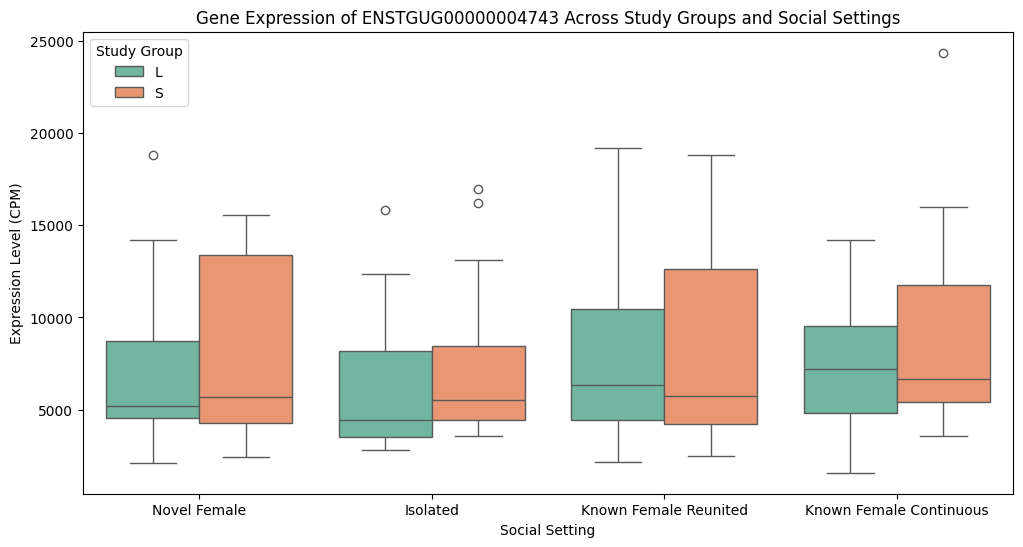

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the normalized dataset
df = pd.read_csv('./dataset/normalized_dataset.csv')

# Select a gene for visualization (example: 'ENSTGUG00000004743', which is Brain-Derived Neurotrophic Factor gene)
selected_gene = 'ENSTGUG00000004743'

# Map the social setting abbreviations to full descriptions
social_setting_map = {
    'ISO': 'Isolated',
    'KFC': 'Known Female Continuous',
    'KF': 'Known Female Reunited',
    'NF': 'Novel Female'
}
df['social_settting'] = df['social_settting'].map(social_setting_map)

# Create a boxplot comparing gene expression across study groups and social settings
plt.figure(figsize=(12, 6))
sns.boxplot(x='social_settting', y=selected_gene, hue='study_group', data=df, palette="Set2")
plt.title('Gene Expression of ' + selected_gene + ' Across Study Groups and Social Settings')
plt.ylabel('Expression Level (CPM)')
plt.xlabel('Social Setting')
plt.legend(title='Study Group')
plt.show()


**Write down your interpretation of the result of this simple barplot, that displays expression level of `BDNF` gene. First, briefly describe `BDNF` and it's function. Then, write your interpretation about any notable observation you see from the plot**

**_Your Answer_**:

<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer this question!</strong>
</blockquote>

**Write down your interpretation of the result of this simple barplot, that displays expression level of `BDNF` gene. First, briefly describe `BDNF` and it's function. Then, write your interpretation about any notable observation you see from the plot**

**_Your Answer_**:

Let's first analyze this chart from different perspectives.
we analyze based on different social settings on a fixed study group;
then we analyze based on fixed social settings and different study groups and finally we compare them collectively.

**between S groups**, birds encountered with known female continuously have higher expression levels while other groups have somehow similar median.
when isolated, IQR was much narrower while having more outliers.
we have spikes in know females reunited.

Q3 was lower for the isolated group while Q1 was even for all groups.

**between L groups**, again we see pikes in know female reunited.
isolated group have less expression medial level.
known female grouph tends to have more elevated level median.

**between L and S groups** In most cases, study groups "S" have a wider IQR, which means they are more spread in case of expression levels
2- forth spreads of cases seem to be equal.
3- for social settings "Novel Female" and "Isolated" and "Known Female Reunited" it seems obvious that the "S" groups have higher gene expression both in terms of overall looks and median.

in known female groups median was higher for L group while it is the other case for the S group.

in terms of Q3, the S group was always higher.
if we combine S and L group for each social setting, we can see that encountring with know female continious makes the birds have higher level of expression.

in terms of outliers we see that only known female reunited is free of that.

results:

In non-sick birds, encountering a new female triggers the highest expression of BDNF, possibly linked to the formation of novel neural circuits for recognizing unfamiliar birds. This could stem from the excitement of diversifying reproduction, leading to heightened BDNF levels. Conversely, when sick, birds display elevated BDNF expression upon reuniting with familiar females. This behavior may reflect a tendency to reminisce about past associations rather than forming new ones, possibly influenced by the illness they are experiencing.

sickness tends to affect experssion levels.
sickness makes expreesion level less diverse in terms of IQR.

we can infer that birds have mixed feelings when encountered with reunited females, given the amount of varibality in their plot.

when a bird sees a novel female its expression levels are highers up and this level is kept mostly for next events with previously known female and continuation events while isolating this bird makes this level narrower.

---


Brain-Derived Neurotrophic Factor (BDNF) is a vital protein that holds a key role in the intricate workings of the nervous system, particularly in the brain. Produced in various brain regions, including the hippocampus, cortex, and basal forebrain, BDNF belongs to the neurotrophin family—a group of proteins crucial for the growth, development, and maintenance of neurons.

One of the central functions of BDNF lies in its facilitation of neurogenesis, the process by which new neurons are generated in the brain. This phenomenon is closely tied to cognitive functions, learning, and memory. BDNF also contributes significantly to synaptic plasticity, the brain's ability to modify the strength and structure of synapses, forming the basis for learning and memory processes.

In addition to its role in the formation of new neurons and synaptic plasticity, BDNF plays a pivotal role in ensuring the survival and health of existing neurons. It protects neurons from cell death, or apoptosis, contributing to the overall maintenance of the nervous system. The protein's influence extends to the regulation of mood, and its dysregulation has been associated with mood disorders, such as depression.

BDNF's impact on learning and memory is profound, as it aids in the creation of new synapses and reinforces existing ones, thereby shaping neural circuits crucial for memory storage. Furthermore, alterations in BDNF levels have been observed in various neurological and psychiatric disorders, including Alzheimer's disease, Huntington's disease, and mood disorders.

Environmental factors, such as stress and physical activity, influence BDNF expression. Chronic stress has been linked to reduced BDNF levels, while activities like exercise have shown the ability to increase BDNF production. The dynamic interplay between BDNF and the nervous system underscores its significance in maintaining a healthy, adaptive, and functioning brain.

[This study](https://pubmed.ncbi.nlm.nih.gov/9452017/) further notes that LPS-induced elevation of BDNF mRNA is corroborated by an increase in BDNF-like immunoreactivity in cultured microglia. This finding strengthens the association between LPS stimulation and the synthesis of BDNF, suggesting a direct link between LPS exposure and increased production of this neurotrophin by microglia.

These results collectively indicate that activated microglia, a phenomenon often observed in damaged brain tissue, play a role in neuronal regeneration. The production of specific neurotrophins, such as BDNF and likely NT-4/5, suggests a potential mechanism through which microglia contribute to supporting neuronal health and recovery. The study provides insights into the intricate interplay between immune responses, microglial activation, and the expression of neurotrophins, highlighting the potential therapeutic implications for promoting neuronal regeneration in the context of brain damage.


<blockquote style="font-family:Arial; color:red; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Don't forget to answer this question!</strong>
</blockquote>

### Diverse Visualization Techniques for Gene Expression Data

A comprehensive exploration of gene expression data requires a multifaceted visualization approach. Beyond the boxplot, we will delve into additional techniques that can bring forth deeper insights from our dataset. You are tasked with implementation and interpretation of the results of at least one of the following visualization methods:

- **PCA (Principal Component Analysis)**: This technique reduces the dimensionality of the data and can reveal the underlying structure by capturing the most variation across samples.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Particularly useful for visualizing high-dimensional data in a lower-dimensional space, t-SNE can help identify clusters of genes or samples.
- **UMAP (Uniform Manifold Approximation and Projection)**: Similar to t-SNE, UMAP is useful for visualization and can be faster and more scalable.

In addition to these, consider the following methods to further dissect the dataset:

- **Histograms and Density Plots**: Useful for showing the distribution of gene expression levels within individual samples or conditions.
- **Boxplots and Violin Plots**: These can summarize the distributions and highlight potential outliers in gene expression levels across samples.
- **Scatter Plots**: When exploring the relationship between different conditions, scatter plots can be particularly revealing.
- **Volcano Plots**: Ideal for showcasing differential expression results, highlighting genes with significant fold changes and statistical significance.

Each method will contribute to a holistic view of the dataset, enabling you to uncover patterns and anomalies that may not be apparent through a single visualization strategy.


#### **Your Turn to Explore**

- **Experiment with Different Genes**: Change the `selected_gene` variable to analyze other genes of interest.
- **Diverse Visualizations**: Consider using heatmaps, violin plots, or scatter plots for different perspectives.
- **Incorporate Statistical Analyses**: Complement visual insights with statistical tests to discern if the differences you observe are significant.

Remember, the goal is to thoroughly understand the dataset, paving the way for more in-depth analyses like differential gene expression or clustering.

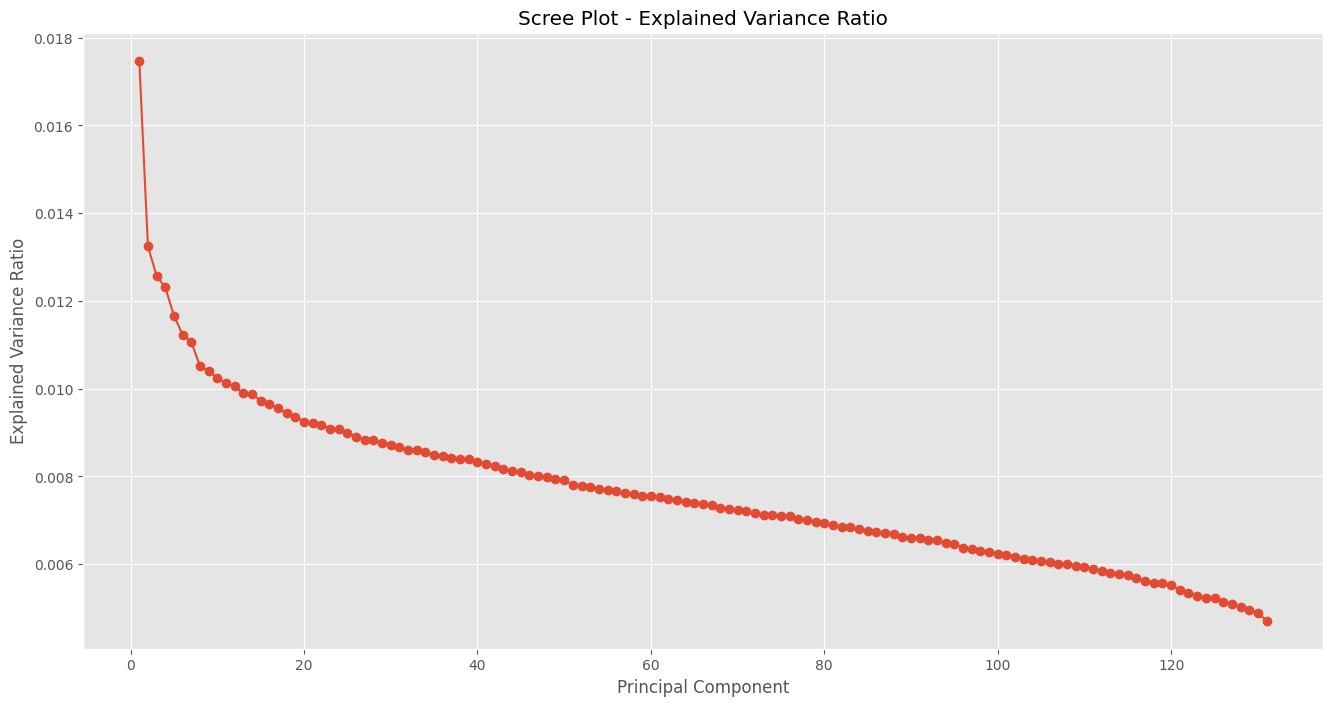

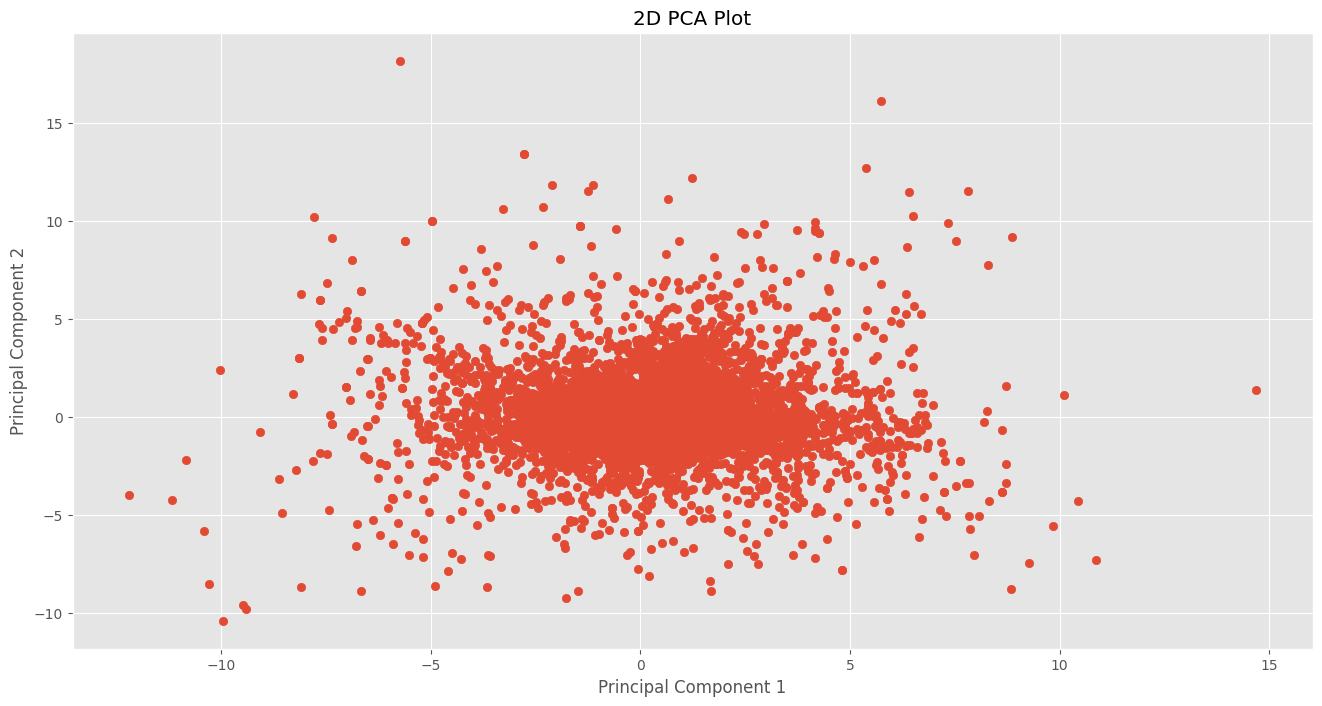

In [ ]:
# Next we plot scree and pve and whole PC analysis
def plot_pca_trends(df):
    # Step 1: Standardize the data
    scaled_data = StandardScaler().fit_transform(df.fillna(0).select_dtypes(include="number").T)

    # Step 2: Perform PCA
    pca = PCA()
    principal_components = pca.fit_transform(scaled_data)

    # Step 3: Explained Variance Ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Step 4: Plot the Scree Plot
    plt.figure(figsize=figsize)
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
    plt.title('Scree Plot - Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

    print("\n")

    # Step 5: Plot 2D PCA
    plt.figure(figsize=figsize)
    plt.scatter(principal_components[:, 0], principal_components[:, 1])
    plt.title('2D PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
plot_pca_trends(df)

     Dimension 1  Dimension 2
0     -53.203239   -81.414230
1      10.719148   -42.603554
2       3.553166   -14.015049
3     -44.608318    40.077198
4      -1.949818    -7.257677
..           ...          ...
126    27.717997    30.289433
127   -83.852028   -40.118134
128    30.506966    16.874231
129    29.439030    44.888584
130    34.643429   -32.551308

[131 rows x 2 columns]


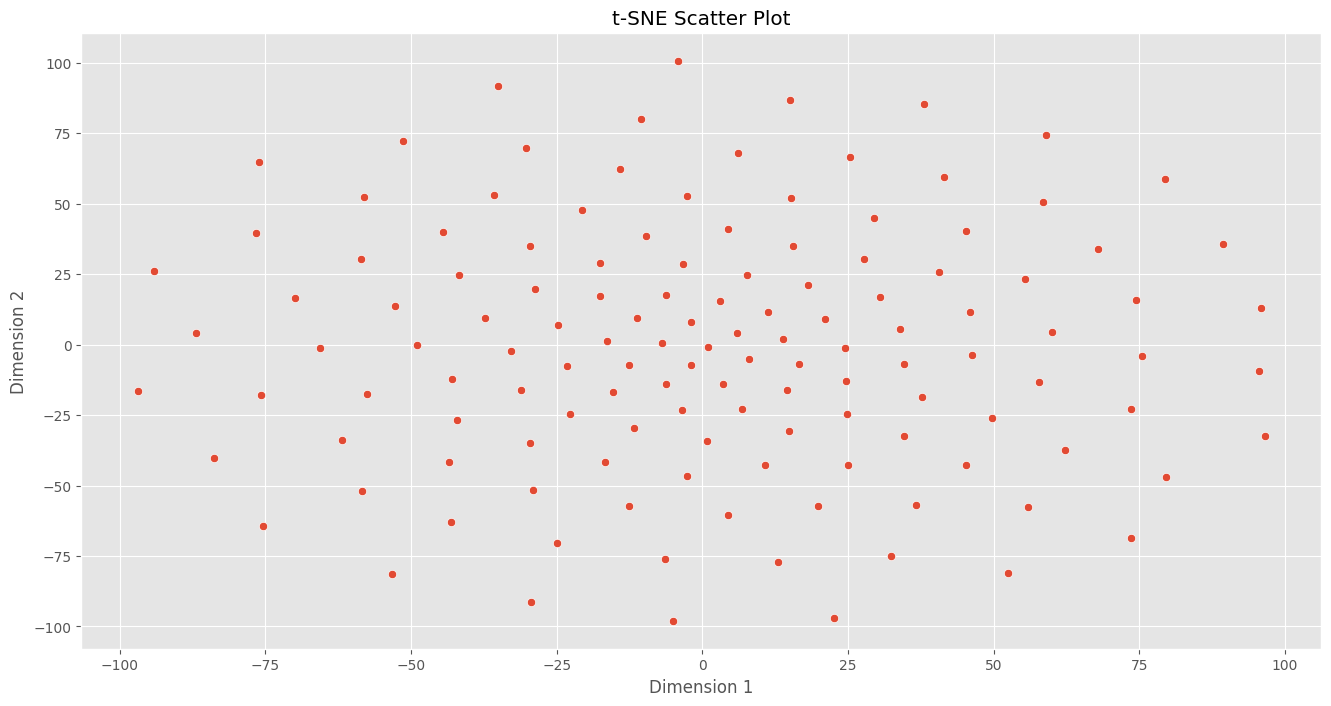

In [ ]:
# Im not sure if it is right
def plot_tsne(df):
    # Select numerical columns for t-SNE
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Extract the numerical features for t-SNE
    X = df[numerical_columns]

    # Initialize t-SNE model
    tsne = TSNE(n_components=2, random_state=42)

    # Fit and transform data
    tsne_result = tsne.fit_transform(X)

    # Create a DataFrame with t-SNE results
    tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])

    print(tsne_df)

    # Plot the t-SNE scatter plot
    plt.figure(figsize=figsize)
    sns.scatterplot(x='Dimension 1', y='Dimension 2', data=tsne_df, palette='viridis')
    plt.title('t-SNE Scatter Plot')
    plt.show()

plot_tsne(df.fillna(0))

In [ ]:
df

,sample_id,social_settting,study_group,tissue_id,ENSTGUG00000008284,ENSTGUG00000003938,ENSTGUG00000011987,ENSTGUG00000017592,ENSTGUG00000009442,ENSTGUG00000009764,...,ENSTGUG00000006386,ENSTGUG00000017785,ENSTGUG00000001573,ENSTGUG00000014656,ENSTGUG00000003563,ENSTGUG00000002845,ENSTGUG00000009990,ENSTGUG00000001666,total_count,total_expression
0,GSM6175777,Novel Female,L,HY3,7916.143473,5231.219920,8352.808004,5319.148936,6991.276372,7795.007878,...,10803.531348,0.0,0.000000,0.000000,4415.388212,5699.138502,9239.730843,13426.303687,6.973611e+05,6.973611e+05
1,GSM6175779,Isolated,S,HY5,8134.519845,4394.224733,8562.769298,5319.148936,6836.602116,6302.346795,...,7825.826725,0.0,0.000000,0.000000,4562.268065,4903.909874,4854.206421,8753.059862,5.393121e+05,5.393121e+05
2,GSM6175780,Isolated,L,HY6,6605.885243,6068.215108,5824.143723,14893.617021,7950.256759,10448.627581,...,5910.519228,0.0,10695.187166,3636.363636,3956.763368,2915.838304,5825.047705,8159.632075,6.174693e+05,6.174693e+05
3,GSM6175781,Isolated,L,HY8,8680.460774,4603.473530,8215.876725,5319.148936,6248.839943,14760.759599,...,5820.739189,0.0,139037.433155,18181.818182,4622.219025,7554.671968,7331.525560,8604.702915,7.334341e+05,7.334341e+05
4,GSM6175782,Isolated,L,HY9,9390.183982,7951.454279,6837.435186,4255.319149,6094.165687,7795.007878,...,4354.331887,0.0,0.000000,18181.818182,3797.893323,3180.914513,5255.933849,6527.705660,1.047639e+06,1.047639e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,GSM6175906,Known Female Continuous,L,TN67,8625.866681,10880.937435,11182.721098,3191.489362,6681.927860,9287.668961,...,7302.109831,0.0,10695.187166,0.000000,8297.212880,4903.909874,11214.890697,6230.991766,7.629991e+05,7.629991e+05
127,GSM6175907,Known Female Continuous,S,TN68,5732.379757,9206.947060,8727.086833,11702.127660,11291.220689,8707.189651,...,9396.977405,0.0,16042.780749,0.000000,11471.616218,4241.219351,10746.208697,5785.920926,7.539647e+05,7.539647e+05
128,GSM6175908,Known Female Continuous,L,TN69,7806.955287,11090.186231,10644.124735,5319.148936,12807.028398,7214.528568,...,6075.115966,0.0,0.000000,10909.090909,12340.905140,9807.819748,7264.570989,7492.025814,8.375822e+05,8.375822e+05
129,GSM6175909,Known Female Continuous,S,TN70,6332.914779,6905.210295,5212.517345,13829.787234,9682.608427,13516.875363,...,7960.496783,0.0,0.000000,14545.454545,12892.453973,7422.133863,9072.344414,8011.275128,8.067703e+05,8.067703e+05


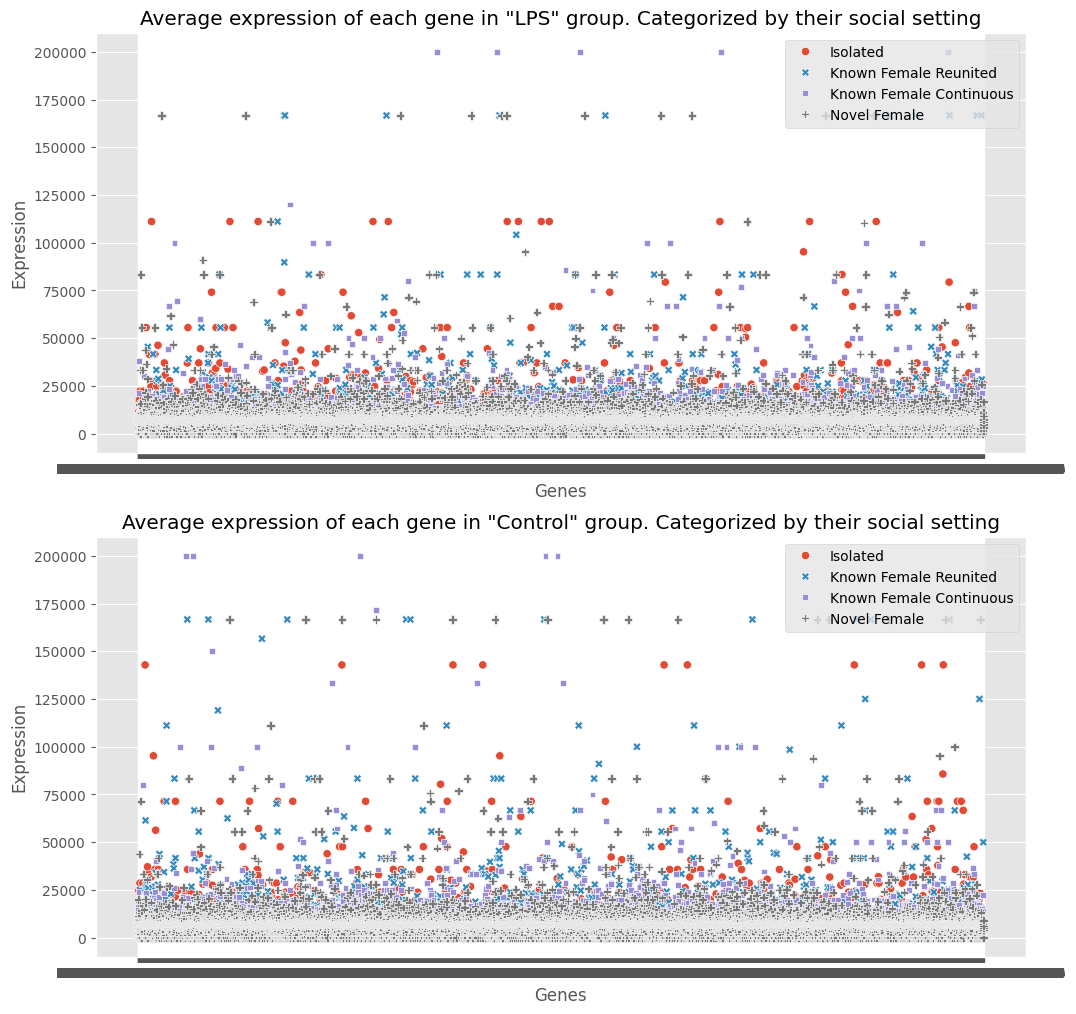

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_expression_by_social_setting(df_path, social_setting_map):
    # Load the dataset
    df = pd.read_csv(df_path)

    # Define metadata columns
    metadata_columns = [
        'sample_id',
        'tissue_id',
        'social_setting',
        'study_group',
    ]

    # Drop NaN values and select a subset of data
    df = df.dropna(axis=1).iloc[0:50]

    # Group by social setting and calculate the mean, then reset index
    social_study_mean = df.drop(columns=metadata_columns[:2]).groupby(metadata_columns[2:]).mean().reset_index()
    social_study_mean['social_setting'] = social_study_mean['social_setting'].map(social_setting_map)

    # Extract data for L group and S group
    l_group = social_study_mean[social_study_mean['study_group']=='L'].drop(columns=['study_group']).T
    s_group = social_study_mean[social_study_mean['study_group']=='S'].drop(columns=['study_group']).T

    # Set column names as the first row and drop it
    l_group.columns = l_group.iloc[0]
    l_group = l_group.drop(l_group.index[0])
    s_group.columns = s_group.iloc[0]
    s_group = s_group.drop(s_group.index[0])

    # Create subplots and scatter plots
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    sns.scatterplot(data=l_group, ax=axs[0])
    axs[0].set_title('Average expression of each gene in "LPS" group.')
    axs[0].set_xlabel('Genes')
    axs[0].set_ylabel('Expression')
    sns.scatterplot(data=s_group, ax=axs[1])

    axs[1].set_title('Average expression of each gene in "Control" group.')
    axs[1].set_xlabel('Genes')
    axs[1].set_ylabel('Expression')
    plt.show()

# Define the file path and social setting mapping
file_path = '/content/normalized_dataset.csv'

# Call the function to plot the expression by social setting
plot_expression_by_social_setting(file_path, {
    'ISO': 'Isolated',
    'KFC': 'Known Female Continuous',
    'KF': 'Known Female Reunited',
    'NF': 'Novel Female'
})


In [56]:
### TODO ###

### Reflecting on Visualizations to Extract Key Insights

As we have navigated through different visualization strategies, it's time to consolidate the knowledge you've gained. Reflect on the insights each visualization has provided:

- **What trends have you observed in the distribution of gene expression levels?**
- **How do the expression levels compare when you look across different conditions or samples?**
- **From the heatmap, were you able to detect any consistent patterns of expression, such as upregulation or downregulation of certain genes?**
- **Did any outliers or unusual expression patterns emerge? What might these suggest about certain genes or the overall data quality?**

Write down your observations and hypotheses. Discuss and note down your interpretations as they will be valuable for the upcoming stages of differential gene expression analysis.

**_Your Answer_**:

---

### Differential Gene Expression Analysis

After exploring the general patterns in our dataset, the next step is Differential Gene Expression (DGE) analysis. This process will help us identify genes whose expression levels significantly differ across treatments or social settings.

#### Addressing High Dimensionality in RNA-Seq Data for Differential Gene Expression Analysis

In RNA-Seq data, high dimensionality (a large number of genes) presents several analytical challenges. This complexity can obscure meaningful biological insights and impact the statistical power of our analyses.

**Challenges of High Dimensionality**:
1. **Statistical Power Loss**: With too many variables (genes), the risk of finding false positives increases, known as the 'multiple testing problem'.
2. **Overfitting Risk**: High-dimensional data can lead to models that are too complex, capturing noise rather than true underlying patterns.
3. **Computational Intensity**: Analyzing thousands of genes simultaneously demands significant computational resources and time.
4. **Interpretation Difficulty**: It becomes challenging to interpret results and extract biologically meaningful conclusions from a vast pool of data.

**Addressing These Challenges**:
1. **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) help in reducing the number of dimensions, making the data more manageable and revealing hidden structures.
2. **RNA-Seq Specific Tools for DGE Analysis**: Tools like DESeq2 and edgeR (available in Python through rpy2 or similar interfaces) are designed to handle high-dimensional data. They offer:
   - **Normalization and Variance Stabilization**: Tailored for RNA-Seq data, ensuring fair comparisons across samples.
   - **FDR Control**: Implement procedures to adjust for multiple comparisons, reducing false positives.
   - **Biological Variance Modeling**: Consider the biological variability, enhancing the reliability of results.

**Python Implementation**:
- In python environments, the use of R-based tools like DESeq2 or edgeR is possible through interfaces such as `rpy2`. This approach allows you to leverage the strengths of these tools while working within a Python framework. However, as stated multiple times in this project, you have freedom to choose alternative method for any task, as long as it makes sense. 



In [ ]:
### TODO ###
# Placeholder for PCA Analysis.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Note: Before applying PCA, it's important to standardize the data
# Example: Standardize the gene expression data (excluding metadata columns)

# Load your expression data here
# expression_data = ...

# Standardize the data
scaler = StandardScaler()
expression_scaled = scaler.fit_transform(expression_data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(expression_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()

# Tip: Explore the variance ratio to decide on the number of components
# Tip: Use annotations or different colors to highlight groups based on treatment or social settings


In [ ]:
### TODO ###
# Placeholder for using a common RNA-Seq analysis tool from Python

import subprocess

# Example: Using DESeq2 via R for Differential Gene Expression Analysis
# DESeq2 is a popular tool for RNA-Seq data, particularly useful for identifying differentially expressed genes

# Define the paths and necessary arguments
r_script_path = 'path/to/deseq2_analysis.R'
input_file_path = 'path/to/normalized_dataset.csv'  # CSV file path
output_file_path = 'path/to/deseq2_output.csv'      # Path to save the DESeq2 output

# Construct the command to run the R script using subprocess
command = ['Rscript', r_script_path, input_file_path, output_file_path]

# Run the command
subprocess.run(command)

# Tips and Hints:
# - Ensure that R and DESeq2 are installed in your environment.
# - The R script should be written to take input and output file paths as arguments.
# - The script should handle the reading of the CSV file, applying DESeq2, and writing the results back to a CSV.
# - In the R script, consider using additional metadata columns (like 'study_group', 'social_settting') as part of the DESeq2 design formula to account for these factors in the analysis.
# - You can capture the output and errors from the subprocess to check if the script ran successfully.
# - For Python users not familiar with R, consider using Python alternatives or interfaces such as rpy2 to work with DESeq2.


### Identifying Differentially Expressed Genes (DEGs)

The core of our RNA-Seq analysis lies in identifying Differentially Expressed Genes (DEGs) between different conditions, such as LPS treatment vs control, and across social settings. Identifying DEGs helps in pinpointing specific genes that are responsive to our experimental treatments.

**Freedom in Methodology**:
- You are free to choose your preferred method or tool for DEG analysis. Whether it's DESeq2, edgeR, or any other method, the key is to reliably identify genes that show statistically significant differences in expression.

### Interpreting the Findings

After identifying DEGs, the next crucial step is interpreting these findings. This involves understanding the biological functions and pathways these genes are involved in.

**Functional Annotation and Pathway Analysis**:
- Utilize databases like Gene Ontology (GO), Kyoto Encyclopedia of Genes and Genomes (KEGG), or DAVID for functional annotation.
- Interpret the roles of these genes in biological processes, cellular components, and molecular functions.

### Visualization for Insightful Understanding

A critical aspect of this phase is visualization. Effective visualizations can provide profound insights into the data and help in communicating your findings.

**Visualizations Can Include**:
- Heatmaps of DEGs.
- Volcano plots showing the significance vs. fold-change.
- Pathway diagrams to illustrate the affected biological pathways.

### Emphasis on Interpretation and Informative Visualization

Remember, the ultimate goal is to not only identify DEGs but to also understand their biological significance and visually represent this information in an insightful and informative manner. Your interpretations and visualizations are crucial for translating raw data into meaningful biological insights.


In [58]:
### TODO ###
# Placeholder for DEG Analysis, Interpretation, and Visualization

# Step 1: DEG Analysis
# Use your chosen tool/method to identify DEGs
# Example: results = DESeq2_DEG_analysis(input_file)

# Step 2: Functional Annotation
# Utilize online databases or tools for gene annotation
# Example: annotated_genes = annotate_genes(results['gene_id'])

# Step 3: Pathway Analysis
# Map the DEGs to biological pathways
# Example: pathways = map_to_pathways(annotated_genes)

# Step 4: Visualization
# Create insightful visualizations of the DEGs
# Example: create_heatmap(results)
# Example: create_volcano_plot(results)
# Example: plot_pathways(pathways)

# Remember to interpret your findings in the context of the biological questions and hypotheses you are exploring.
# Consider the biological significance of the DEGs and their roles in the context of your study.